In [1]:
#! /usr/bin/python
# -*- coding: utf-8 -*-
# ~.py

# Version: 2018.11.29.01

# Requiered libraries
import sys, os, math, time
import numpy as np
import scipy.linalg as cpy
import matplotlib.pyplot as plt
from numba import jit, njit, prange

In [2]:
def D1CN(dt,dx,ic,alpha,X,T,N):
    r = dt*(alpha/dx)**2
    aux = np.zeros(N+1)
    aux[0] = 2*(1+r)
    aux[1] = -r
    A = cpy.toeplitz(aux)
    A[0]=A[-1]=0
    A[0,0]= A[-1,-1]=1
    aux[0] = 2*(1-r)
    aux[1] = r
    
    B = cpy.toeplitz(aux)
    A[0] = A[-1] = B[0] = B[-1] = 0
    A[0,0] = A[-1,-1] = B[0,0] = B[-1,-1] = 1
    C = np.linalg.solve(A,B)
    ic = C@ic
    return np.transpose(ic)

In [3]:
N = 10
dt = 5e-3
T = 400

u = np.zeros((T,N+1), np.double)
(x,dx) = np.linspace(0,1,N+1, retstep=True)

alpha = dt/dx**2

u[0,0] = 0.
u[0,-1]= 1.
u2 = u[0,:]
u2 = u2.reshape(u2.shape+(1,))
u = np.transpose(u)
print("alpha =\n",alpha)
print("x =\n",x)
print("u[0] =\n",u)

alpha =
 0.4999999999999999
x =
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
u[0] =
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [4]:
for ii in range(1,T):
    t = np.transpose(u[:,ii-1])
    t = t.reshape(t.shape+(1,))
    t = D1CN(dt, dx, t, alpha, x, T, N)
    u[::,ii] = t
u = np.transpose(u)

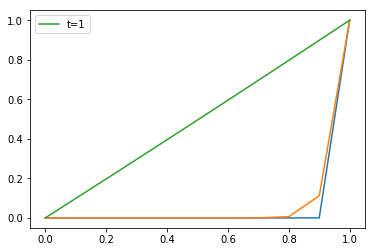

In [5]:
plt.plot(x,u[0])
plt.plot(x,u[1])
'''plt.plot(x,u[:,2])
plt.plot(x,u[:,3])
plt.plot(x,u[:,4])
plt.plot(x,u[:,5])
plt.plot(x,u[:,6])
#plt.plot(x,u[:,7])
'''#plt.plot(x,u[:,8])
plt.plot(x,u[-1], label = "t=1")
plt.legend(loc='best')
plt.show()

In [6]:
print(u[0])
print(u[1])
print(u[-1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.00000000e+00 1.03358589e-11 1.86045459e-10 3.33848241e-09
 5.99066379e-08 1.07498100e-06 1.92897514e-05 3.46140543e-04
 6.21124003e-03 1.11456180e-01 1.00000000e+00]
[0.         0.098521   0.19718677 0.29612792 0.3954481  0.49521385
 0.5954481  0.69612792 0.79718677 0.898521   1.        ]
